In [1]:
import numpy as np 
from os.path import expanduser
import os
import re
from matplotlib import pyplot
from collections import Counter

#Regular expression for only words 
RE = re.compile('[A-Za-z]+')
#file specific dictionary, fsd[file]{word:frequency}
fsd ={}
#Stop words
StopWords=["a", "about","doesn","writes","above","good", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
stop_words= {}
#stop words in a dictionary for faster search
for wrd in StopWords :
    stop_words[wrd] = True;
#dictionary with words and their frequencies 
dictionary = {}
#array versioan of dictionary
dick= []
#home directory 
homee= "C:\\Users\\dkm\\pySpace\\PROJECTS\\ml\\Text_Classification\\20newsgroups-mld\\mini_newsgroups\\mini_newsgroups"
#final data array 
data = [["File names " ,"catogary"]]

In [2]:
#### Stopinator 
##Look at the frirst 30 lines in each file as they are meta tags they shall be removed  
#so all the words are addes to a string which then will be added to stop_word dictionarey  
wastedLines = ""
for dirpath, dirs, files in os.walk(homee):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        with open(fname) as myfile: 
            for line in (myfile.read()).split('\n'):
                if ':' not in line :
                    break
                wastedLines += " "+line 
## Wasted words 
for word in (RE.findall(wastedLines)):
    stop_words[word.lower()]=True
#Now we have more stop words 

In [3]:
#takes a file, extracts non-stop_words and records frequencies 
def process(fname, dictionary,stop_words):
        fName= (fname.split("\\"))[-1]
        #fName is filename fname is completepath
        fsd[fName] ={}
        with open(fname) as myfile: 
            for word in (RE.findall(myfile.read())):
                if len(word)<2 or ( word.lower() in stop_words):
                    continue
                if word in fsd[fName]:
                    fsd[fName][word] +=1
                else :
                    fsd[fName][word] =1  
                if word in dictionary :
                    dictionary[word] +=1 
                else:
                    dictionary[word] =1
        return

In [4]:
#Final Data table 
count=0
for dirpath, dirs, files in os.walk(homee):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        data = np.append(data,[[filename, (dirpath.split("\\"))[-1]]],axis=0)


In [5]:
#dictonary phase
##build dictionary with filename : frequency structure 
for dirpath, dirs, files in os.walk(homee):
    for filename in files:
        fname = os.path.join(dirpath,filename)
        process(fname,dictionary,stop_words)
len(dictionary),len(fsd)

##status        
len(dictionary),len(stop_words),len( dick)

(29261, 11833, 0)

In [6]:
###DICK CREATION 
dick = np.rec.fromarrays([[i for i in dictionary.keys()],[i for i in dictionary.values()] ],names =('word','frequency'))
dick = (sorted(dick,key=lambda x: (x[1])))
##status  
len(dictionary),len(stop_words),len( dick)

(29261, 11833, 29261)

In [7]:
##Terminator
##the code below eliminates the words common in all files by searching the word in every file one by one
file_count= len(fsd.keys())
for word,frequency in dick:
    if frequency < file_count: 
        break
    Is_this_word_in_every_file = True
    for file in fsd.keys():
        if word not in fsd[file]:
            Is_this_word_in_every_file = False
            print(word, "not in ", fname )
            break
    if Is_this_word_in_every_file : 
        [fsd[thisFile].pop(word) for thisFile in fsd.keys()]
        dictionary.pop(word)
##statusy        
len(dictionary),len(stop_words),len( dick)

(29261, 11833, 29261)

In [8]:
counter =0
for i,j in dick :
    counter+=1
    
    if j ==10:
        break
dick = dick[counter-2 : len(dick )]
dick.reverse()

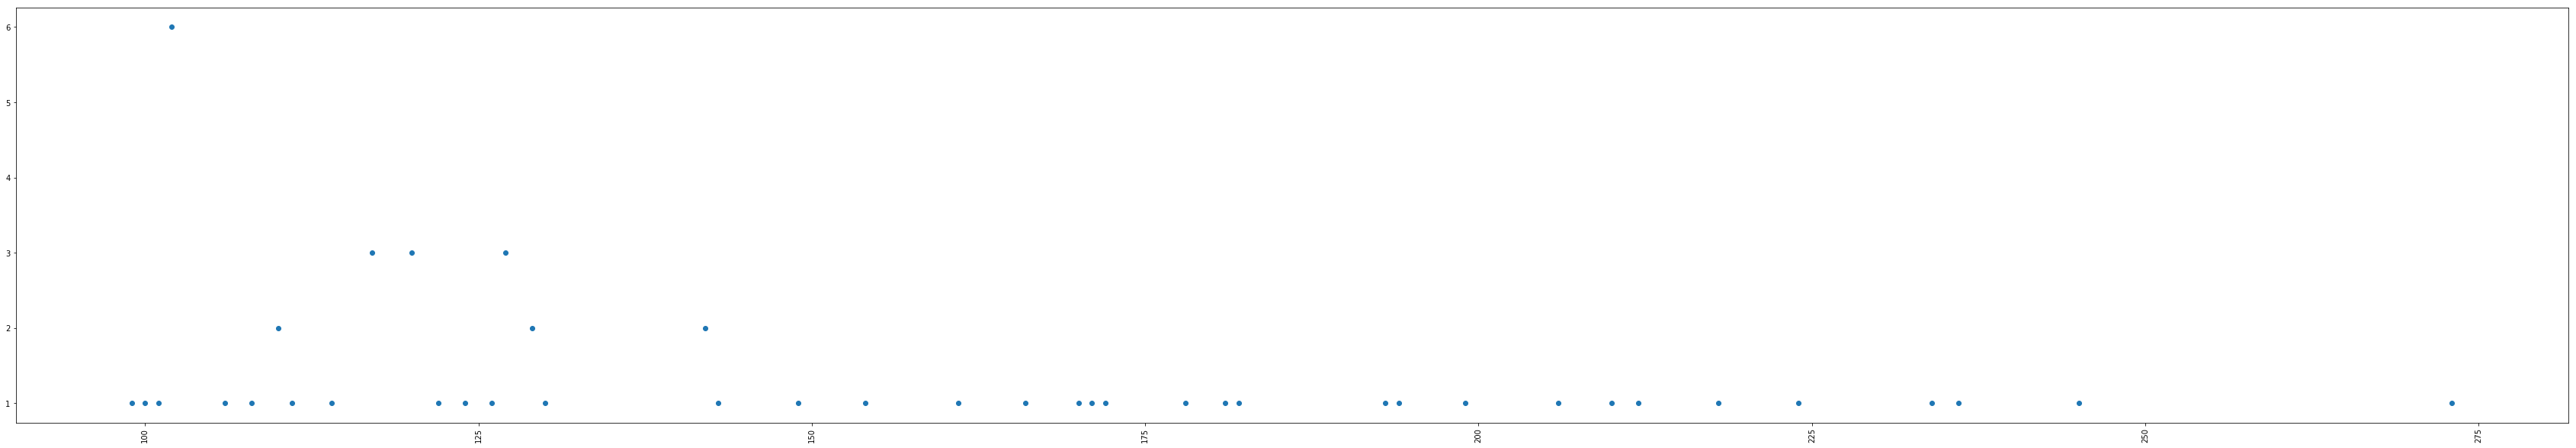

In [9]:
#Remove below a certain threshold say top 90% stays 
Counter(dictionary.values())
dick2 =np.array( [i for j,i in dick[0:len(dick)]] ,dtype= int)

import matplotlib.pyplot as plt
fig_size=[0,0]
fig_size[0] = 60
fig_size[1] = 10

plt.rcParams["figure.figsize"] = fig_size
plt.xticks(rotation=90)

x = Counter(dick2).keys()
y = Counter(dick2).values()
plt.scatter(x,y)
plt.show()

##Frequency of frequencies 

In [11]:
len(dick)

55